In [1184]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

Load Dataset

In [1185]:
df = pd.read_csv("Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [1186]:
df.shape

(150, 6)

In [1187]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [1188]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [1189]:
df.duplicated().sum()

np.int64(0)

Exploratory Data Analyses - EDA

In [1190]:
df.drop('Id', axis=1, inplace=True)

In [1191]:
df['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

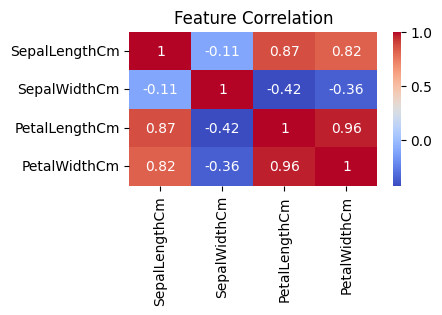

In [1192]:
cols = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
corr = df[cols].corr()

plt.figure(figsize=(4,2))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Feature Correlation")
plt.show()

Skewness: SepalLengthCm    0.314911
SepalWidthCm     0.334053
PetalLengthCm   -0.274464
PetalWidthCm    -0.104997
dtype: float64


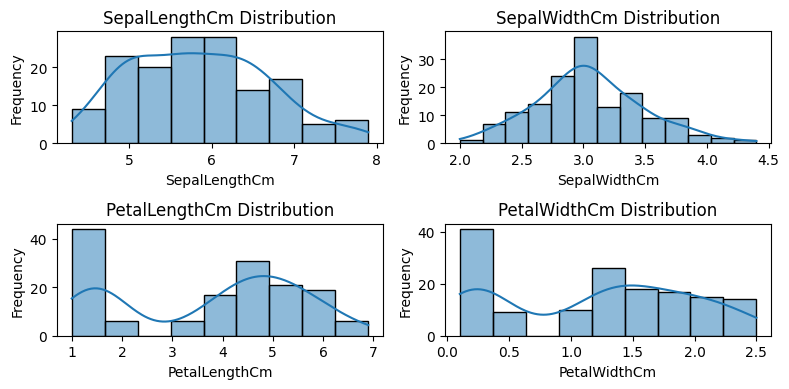

In [1193]:
cols = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
print("Skewness:",df[cols].skew())

plt.figure(figsize=(8,4))
for i, col in enumerate(cols, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[col], kde=True)
    plt.title(f"{col} Distribution")
    plt.xlabel(col)
    plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

SepalLengthCm: 0 outliers
SepalWidthCm: 4 outliers
PetalLengthCm: 0 outliers
PetalWidthCm: 0 outliers


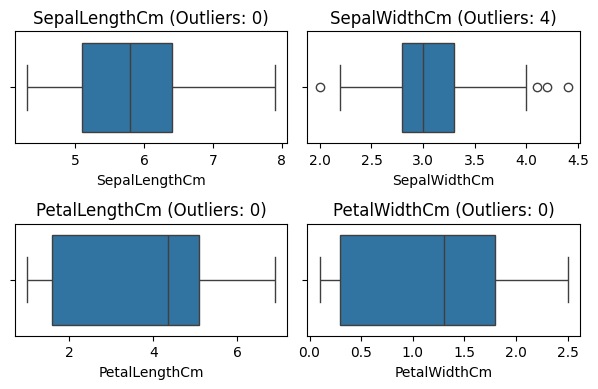

In [1194]:
cols = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

plt.figure(figsize=(6,4))
for i, col in enumerate(cols, 1):
    Q1, Q3 = df[col].quantile([0.25, 0.75])
    IQR = Q3 - Q1
    outliers_count = df[(df[col] < Q1 - 1.5*IQR) | (df[col] > Q3 + 1.5*IQR)].shape[0]
    print(f"{col}: {outliers_count} outliers")
    
    plt.subplot(2, 2, i)
    sns.boxplot(x=df[col])
    plt.title(f"{col} (Outliers: {outliers_count})")
plt.tight_layout()
plt.show()

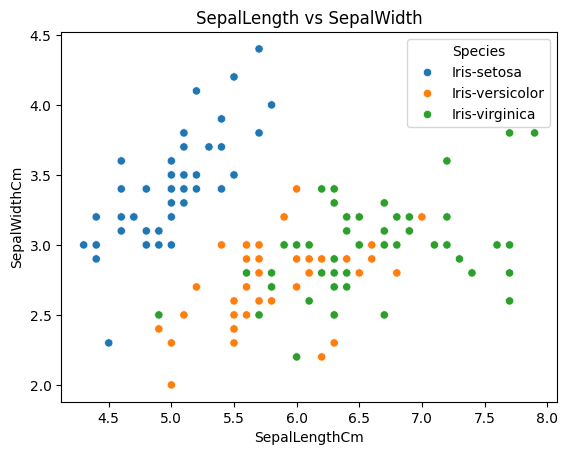

In [1195]:
sns.scatterplot(x='SepalLengthCm', y='SepalWidthCm', hue='Species', data=df)
plt.title("SepalLength vs SepalWidth")
plt.show()

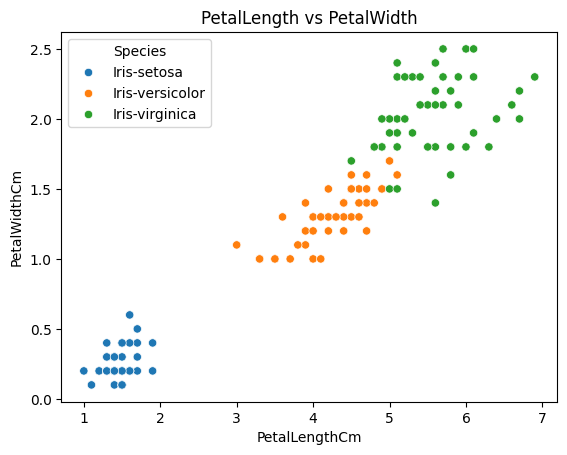

In [1196]:
sns.scatterplot(x='PetalLengthCm', y='PetalWidthCm', hue='Species', data=df)
plt.title("PetalLength vs PetalWidth")
plt.show()

Feature Selection

In [1197]:
X = df.drop('Species', axis=1)
y = df['Species']

Encode target labels

In [1198]:
le = LabelEncoder()
y_encoded = le.fit_transform(y)

Split train - test

In [1199]:
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

Feature Scaling

In [1200]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Train SVM (Linear kernel)

In [1201]:
linear_svm = SVC(kernel='linear', C=1.0, random_state=42)
linear_svm.fit(X_train_scaled, y_train)

,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [1202]:
y_pred_linear = linear_svm.predict(X_test_scaled)

Linear SVM

Accuracy: 1.0

Macro F1-score: 1.0

Confusion Matrix:
 [[10  0  0]
 [ 0 10  0]
 [ 0  0 10]]


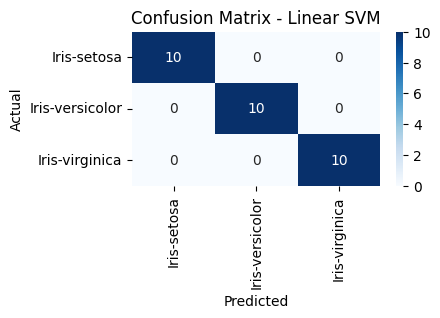


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [1203]:
print("Linear SVM")

print("\nAccuracy:", accuracy_score(y_test, y_pred_linear))

print("\nMacro F1-score:", f1_score(y_test, y_pred_linear, average='macro'))

print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_linear))

cm = confusion_matrix(y_test, y_pred_linear)
plt.figure(figsize=(4,2))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Linear SVM')
plt.show()

print("\nClassification Report:\n", classification_report(y_test, y_pred_linear))

Train SVM (Polynomial kernel)

In [1204]:
poly_svm = SVC(kernel='poly', degree=3, C=1.0, random_state=42)
poly_svm.fit(X_train_scaled, y_train)

,C,1.0
,kernel,'poly'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [1205]:
y_pred_poly = poly_svm.predict(X_test_scaled)

Polynomial SVM

Accuracy: 0.9

Macro F1-score: 0.8976982097186701

Confusion Matrix:
 [[10  0  0]
 [ 0 10  0]
 [ 0  3  7]]


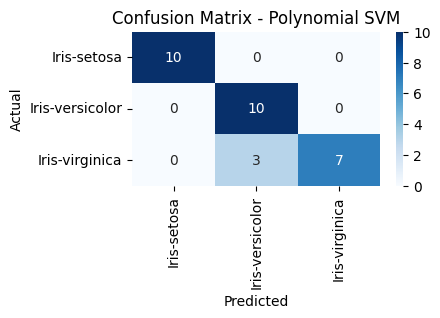


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.77      1.00      0.87        10
           2       1.00      0.70      0.82        10

    accuracy                           0.90        30
   macro avg       0.92      0.90      0.90        30
weighted avg       0.92      0.90      0.90        30



In [1206]:
print("Polynomial SVM")

print("\nAccuracy:", accuracy_score(y_test, y_pred_poly))

print("\nMacro F1-score:", f1_score(y_test, y_pred_poly, average='macro'))

print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_poly))
cm = confusion_matrix(y_test, y_pred_poly)
plt.figure(figsize=(4,2))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Polynomial SVM')
plt.show()

print("\nClassification Report:\n", classification_report(y_test, y_pred_poly))

Train SVM (RBF kernel)

In [1207]:
rbf_svm = SVC(kernel='rbf', C=1.0, random_state=42)
rbf_svm.fit(X_train_scaled, y_train)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [1208]:
y_pred_rbf = rbf_svm.predict(X_test_scaled)

RBF SVM

Accuracy: 0.9666666666666667

Macro F1-score: 0.9665831244778612

Confusion Matrix:
 [[10  0  0]
 [ 0  9  1]
 [ 0  0 10]]


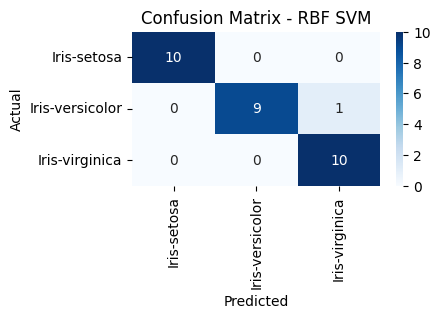


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.90      0.95        10
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



In [1209]:
print("RBF SVM")

print("\nAccuracy:", accuracy_score(y_test, y_pred_rbf))

print("\nMacro F1-score:", f1_score(y_test, y_pred_rbf, average='macro'))

print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rbf))
cm = confusion_matrix(y_test, y_pred_rbf)
plt.figure(figsize=(4,2))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - RBF SVM')
plt.show()

print("\nClassification Report:\n", classification_report(y_test, y_pred_rbf))

Save trained Linear SVM model

In [1210]:
import pickle

with open('linear_svm_model.pkl', 'wb') as f:
    pickle.dump({
        'model': linear_svm,
        'scaler': scaler,
        'label_encoder': le
    }, f)

print("Linear SVM model saved as 'linear_svm_model.pkl'")

Linear SVM model saved as 'linear_svm_model.pkl'
